In [1]:
import matplotlib.pyplot as plt; import numpy as np; import pylab; import os; import plotly.plotly as py;
import plotly.tools as tls
from statsmodels import robust


In [2]:
# First create a speciment list to read in all the data files. 
# Function to create a list of specimen names from the specimen key file. 
def parse_specimen_key():
    data = [];a=[];b=[];c=[];d=[];e=[];f=[];g=[];h=[];i=[];j=[];k=[];
    f = open("Specimen Key.txt",'r')
    for line in f: data.append(line)
    f.close()   
    for i in range(len(data)):
        a1,b1,c1,d1,e1,f1,g1,h1,i1,j1,k1 = data[i].split(",")
        h.append(h1)  
    del h[0]; return (h)

specimen__name_list = parse_specimen_key()

In [3]:
# Build filename for look up file in raw data
def build_filename(specimen_name, measurement_type):
    filename = (specimen_name + measurement_type + ".txt")
    filename = os.path.join("Raw_Data","Editted Filenames", filename)
    
    return(filename)

In [4]:
# Function to create a parse the voltage and current from .txt data files. 
def parse_data(filename):
    data = []; time = []; voltage = []; current = [];
    f = open(filename,'r')
    for line in f: data.append(line)
    f.close()   
    for i in range(len(data)):
        t, v, c = data[i].split(",")
        time.append(float(t))
        voltage.append(float(v))
        current.append(float(c)) 
        
    return (time, voltage, current)

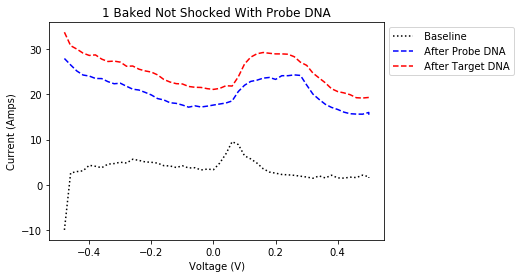

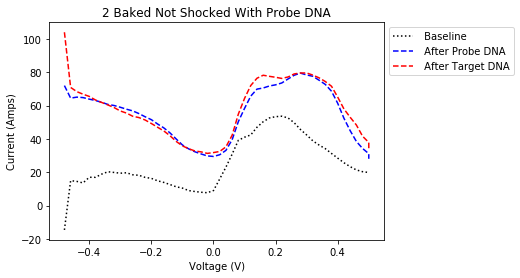

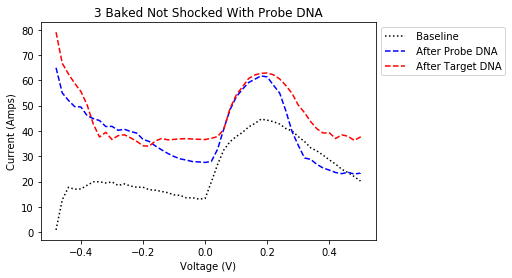

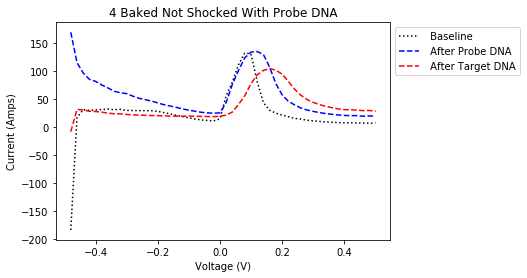

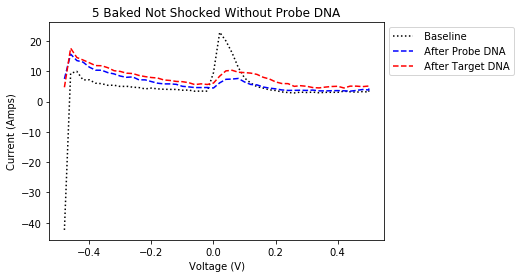

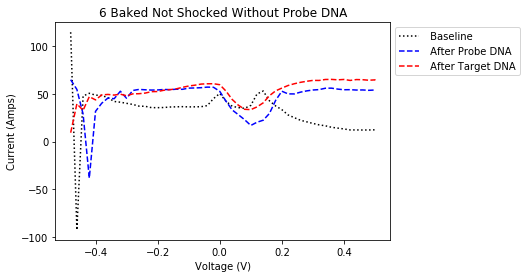

In [5]:
# Graph each specimen to observe general trends during the epxeriment. 
# Identify conclusive datasets for further analysis. 

# Function to plot the voltage vs current
def plot_data(specimen_name_list):    
    measurement_type = [" Baseline", " After Probe DNA", " After Target DNA"]
    plot_color = ["black","blue","red","green"]
    plot_linestyle = [":","--","--","--"]
        
    for k in range(len(specimen_name_list)): 
        specimen_name = specimen_name_list[k]
        
        for j in range(1):        
            for i in range(len(measurement_type)): 
                filename = build_filename(specimen_name, measurement_type[i])      
                time, voltage, current = parse_data(filename)
                plt.plot(voltage, current, color=plot_color[i], linestyle=plot_linestyle[i], label=measurement_type[i])
                pylab.legend(loc='upper left',bbox_to_anchor=(1,1))
  
            plt.xlabel('Voltage (V)'); 
            plt.ylabel('Current (Amps)'); #plt.ylim((0,120))
            plt.title(specimen_name)
        
            filename = os.path.join("Figures","Each Electrode", specimen_name + '.jpg')
            plt.savefig(filename, bbox_inches='tight') 
            plt.show()  
        
plot_data(specimen__name_list)

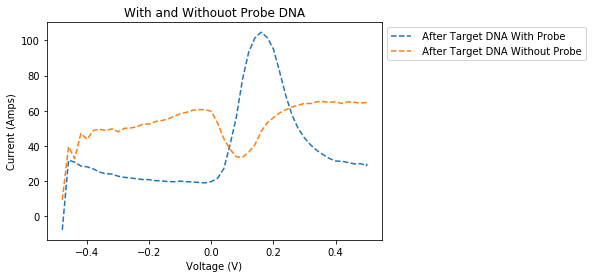

In [16]:
# Function to plot the voltage vs current
def plot_data(specimen_name_list, title):    
    measurement_type = [" Baseline", " After Probe DNA", " After Target DNA"]
    plot_color = [[.2,.2,.2],[1,0,0],[0,1,0],[.3,.3,1]]
    plot_linestyle = ["--",":","--","--",":",":"]
    probe_variable = [" With Probe"," Without Probe"]
        
    for k in range(len(specimen_name_list)): 
        specimen_name = specimen_name_list[k]
        
        for i in range(len(measurement_type)): 
            
            if i > 1:
                filename = build_filename(specimen_name, measurement_type[i])      
                time, voltage, current = parse_data(filename)
                label_name = (measurement_type[i] + probe_variable[k])    
                plt.plot(voltage, current, linestyle=plot_linestyle[i+1], label=label_name)
                pylab.legend(loc='upper left',bbox_to_anchor=(1,1))
  
    plt.xlabel('Voltage (V)');   # plt.xlim((0,1))
    plt.ylabel('Current (Amps)'); #plt.ylim((0,120))
    plt.title(title)
        
    filename = os.path.join("Figures","Comparison with and without Probe DNA", specimen_name + '.jpg')
    plt.savefig(filename, bbox_inches='tight')  
    plt.show()  
 
specimen_short_list = specimen__name_list

specimen_short_list = [specimen_short_list[3],specimen_short_list[5]]
plot_data(specimen_short_list, "With and Withouot Probe DNA")
